In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install openpyxl
raw_data = pd.read_excel('../../grapes_dataset_v5.xlsx', engine='openpyxl')

In [3]:
raw_data.dtypes

Unnamed: 0      int64
area          float64
perimeter     float64
red_mean      float64
green_mean    float64
blue_mean     float64
f1            float64
f2            float64
red_std       float64
green_std     float64
blue_std      float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
label           int64
dtype: object

In [4]:
raw_data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [5]:
raw_data.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8',
       'label'],
      dtype='object')

In [6]:
raw_data.corr(method ='pearson')

,area,perimeter,red_mean,green_mean,blue_mean,f1,f2,red_std,green_std,blue_std,f4,f5,f6,f7,f8,label
area,1.000000,0.923309,0.297200,0.289389,0.279050,0.268648,-0.268648,0.262766,0.048905,0.009301,0.039515,0.183966,-0.404010,-0.409184,-0.001690,-0.083366
perimeter,0.923309,1.000000,0.129451,0.123017,0.124043,0.126126,-0.126126,0.190323,0.060917,0.042479,0.075568,0.140691,-0.217049,-0.215978,-0.023509,-0.010691
red_mean,0.297200,0.129451,1.000000,0.922089,0.841150,0.757691,-0.757691,0.642223,0.261047,0.110808,0.122496,0.397997,-0.855043,-0.864171,0.018949,-0.523499
green_mean,0.289389,0.123017,0.922089,1.000000,0.944314,0.723569,-0.723569,0.487626,0.379264,0.218671,0.098451,0.381727,-0.884613,-0.901377,0.098437,-0.443134
blue_mean,0.279050,0.124043,0.841150,0.944314,1.000000,0.482163,-0.482163,0.472917,0.449855,0.432840,0.137133,0.393844,-0.827651,-0.838467,0.150709,-0.226333
f1,0.268648,0.126126,0.757691,0.723569,0.482163,1.000000,-1.000000,0.373021,0.015180,-0.329813,0.030196,0.285332,-0.730959,-0.748792,-0.126072,-0.714218
f2,-0.268648,-0.126126,-0.757691,-0.723569,-0.482163,-1.000000,1.000000,-0.373021,-0.015180,0.329813,-0.030196,-0.285332,0.730959,0.748792,0.126072,0.714218
red_std,0.262766,0.190323,0.642223,0.487626,0.472917,0.373021,-0.373021,1.000000,0.594888,0.466991,0.441833,0.489539,-0.453330,-0.418950,-0.009628,-0.248023
green_std,0.048905,0.060917,0.261047,0.379264,0.449855,0.015180,-0.015180,0.594888,1.000000,0.839365,0.342033,0.266580,-0.129858,-0.109912,0.316203,-0.007136
blue_std,0.009301,0.042479,0.110808,0.218671,0.432840,-0.329813,0.329813,0.466991,0.839365,1.000000,0.446472,0.332635,-0.047154,-0.010702,0.181130,0.333443


**Insights:**

Also f1 and f2 are mutually relative So one of them can be removed

In [22]:
cleaned_data = raw_data #.drop(['f1'],axis = 1, inplace=False)

In [23]:
cleaned_data.corr(method ='pearson')

,area,perimeter,red_mean,green_mean,blue_mean,f1,f2,red_std,green_std,blue_std,f4,f5,f6,f7,f8,label
area,1.000000,0.923309,0.297200,0.289389,0.279050,0.268648,-0.268648,0.262766,0.048905,0.009301,0.039515,0.183966,-0.404010,-0.409184,-0.001690,-0.083366
perimeter,0.923309,1.000000,0.129451,0.123017,0.124043,0.126126,-0.126126,0.190323,0.060917,0.042479,0.075568,0.140691,-0.217049,-0.215978,-0.023509,-0.010691
red_mean,0.297200,0.129451,1.000000,0.922089,0.841150,0.757691,-0.757691,0.642223,0.261047,0.110808,0.122496,0.397997,-0.855043,-0.864171,0.018949,-0.523499
green_mean,0.289389,0.123017,0.922089,1.000000,0.944314,0.723569,-0.723569,0.487626,0.379264,0.218671,0.098451,0.381727,-0.884613,-0.901377,0.098437,-0.443134
blue_mean,0.279050,0.124043,0.841150,0.944314,1.000000,0.482163,-0.482163,0.472917,0.449855,0.432840,0.137133,0.393844,-0.827651,-0.838467,0.150709,-0.226333
f1,0.268648,0.126126,0.757691,0.723569,0.482163,1.000000,-1.000000,0.373021,0.015180,-0.329813,0.030196,0.285332,-0.730959,-0.748792,-0.126072,-0.714218
f2,-0.268648,-0.126126,-0.757691,-0.723569,-0.482163,-1.000000,1.000000,-0.373021,-0.015180,0.329813,-0.030196,-0.285332,0.730959,0.748792,0.126072,0.714218
red_std,0.262766,0.190323,0.642223,0.487626,0.472917,0.373021,-0.373021,1.000000,0.594888,0.466991,0.441833,0.489539,-0.453330,-0.418950,-0.009628,-0.248023
green_std,0.048905,0.060917,0.261047,0.379264,0.449855,0.015180,-0.015180,0.594888,1.000000,0.839365,0.342033,0.266580,-0.129858,-0.109912,0.316203,-0.007136
blue_std,0.009301,0.042479,0.110808,0.218671,0.432840,-0.329813,0.329813,0.466991,0.839365,1.000000,0.446472,0.332635,-0.047154,-0.010702,0.181130,0.333443


In [24]:
cleaned_data = cleaned_data.dropna()

In [25]:
raw_data.shape

(4346, 16)

In [26]:
cleaned_data.shape

(4346, 16)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold 


In [28]:
df = cleaned_data.reset_index()

In [29]:
X = df.drop(['index','label'],axis = 1, inplace=False)
y = df['label']
print(X.shape)
print(y.shape)

(4346, 15)
(4346,)


In [30]:
k = 5
kf = KFold(n_splits=k, random_state=9, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)            # classification
    acc = accuracy_score(pred_values , y_test)     # Classification

    #acc = model.score(X_test,y_test)                # Regression
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Score of each fold - {}'.format(acc_score))
print('Avg Score : {}'.format(avg_acc_score))

Score of each fold - [0.8632183908045977, 0.8699654775604143, 0.8780207134637514, 0.8653624856156502, 0.8745684695051784]
Avg Score : 0.8702271073899185


# **K- fold Cross validation accuracy:**
# **0.8715675675675676**

# ROC Curve

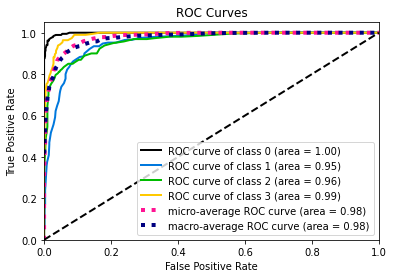

In [31]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probas)

plt.show()

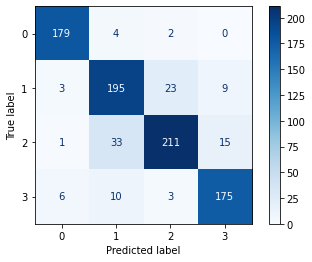

In [32]:
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format = 'd',cmap = 'Blues',display_labels = ['0','1','2','3'])

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, [0,1,2,3]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       185
           1       0.81      0.85      0.83       230
           2       0.88      0.81      0.85       260
           3       0.88      0.90      0.89       194

    accuracy                           0.87       869
   macro avg       0.88      0.88      0.88       869
weighted avg       0.88      0.87      0.87       869



# Deployment

In [34]:
from sklearn.ensemble import RandomForestClassifier
lm = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
lm.fit(X,y)
print('Training Score: ',lm.score(X,y))

Training Score:  0.99516797054763


In [35]:
lm.feature_importances_

array([0.03759165, 0.03982278, 0.07321199, 0.06459146, 0.07521416,
       0.12648616, 0.13449407, 0.04168529, 0.03845506, 0.05352139,
       0.06350827, 0.06329149, 0.04107125, 0.03747648, 0.10957851])

# Selected Features

In [21]:
X.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8'],
      dtype='object')